## Quadratic and Cosine Model

[▲ Overview](0.0-Overview.ipynb)

[◀ Quadratic Model](4.1-Quadractic-model.ipynb)

Adding a periodic term to the linear model with $f_3(t) = cos(2\pi t)$ allows to capture seasonality, $y(t)$ is modelled as $y(t) = \beta_0 + \beta_1 t + \beta_2 t^2 + \beta_3 cos(2\pi t)$.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

The parametrization of the periodic function is chosen such that
1. the period of the function is one year
2. extreme values are obtained in the beginning of the period.

This parametrization is justified by observing the yearly seasonality with lowest values in January.

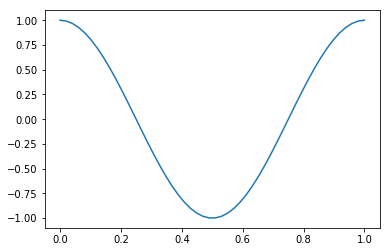

In [2]:
t = np.linspace(0,1)
plt.plot(t, np.cos(t*2*np.pi));

In [3]:
from australian_housing import paths
from australian_housing.models.ols_model import periodic_regressor, fit_ols, history_and_prediction_plot

In [4]:
ts = pd.read_csv(paths.manager.processed_data_file, index_col=0, parse_dates=[0])

In [5]:
regr = periodic_regressor(poly_order=2, add_cosine=True)

In [6]:
model_fit = fit_ols(ts, regr)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     73.25
Date:                Sat, 08 Dec 2018   Prob (F-statistic):           2.10e-21
Time:                        22:46:59   Log-Likelihood:                -502.90
No. Observations:                  73   AIC:                             1014.
Df Residuals:                      69   BIC:                             1023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.136e+07   4.21e+07     -2.170      0.033   -1.75e+08   -7.36e+06
x1          9.048e+04   4.18e+04      2.164      0.034    7085.932    1.74e+05
x2           -22.4025     10.376     -2.159      0.034     -43.102      -1.703
x3          -204.7772     40.335     -5.077      0.000    -285.244    -124.310
==============================================================================
Omnibus:                        3.838   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                3.215
Skew:                          -0.505   Prob(JB):                        0.200
Kurtosis:                       3.187   Cond. No.                     5.98e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.36e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

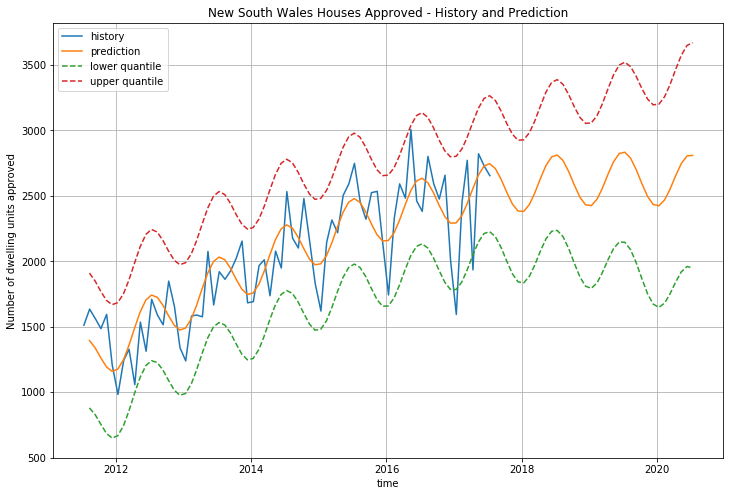

In [7]:
fig = plt.figure(figsize=(12,8))
history_and_prediction_plot(fig, ts, model_fit, regr, '2020-07-01', 'M', 0.05);

The plot of the periodic model shows a a sub-linear upwards trend with seasonality. The cosine function does not perfectly represent the seasonality (which shows more extreme fluctuations). A non-parametric regressor function for the periodic part might work better.

In the summary of model fit, all parameters are significant to the 5% level. $R^2$ is increased compared to the linear and quadratic model as the seasonal fluctuations can now be better represented.

### Residual Analysis

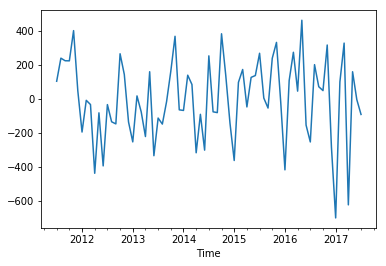

In [8]:
model_fit.resid.plot();

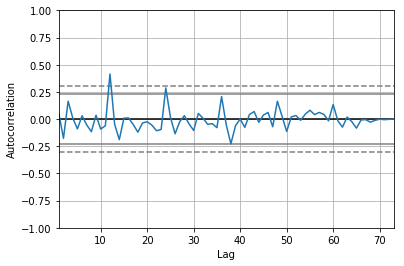

In [9]:
autocorrelation_plot(model_fit.resid);

Autocorrelation of the residuals is lower than in the linear and quadratic model, but is still higher compared to the empirically decomposed residuals. This means that seasonality is still not fully captured by this model.

[▲ Overview](0.0-Overview.ipynb)

[◀ Quadratic Model](4.1-Quadractic-model.ipynb)